# Artificial Neural Network

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.utils.vis_utils import plot_model

In [2]:
dataset, info = tfds.load(name='mnist', with_info=True, as_supervised=True)

In [3]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [4]:
examples = tfds.as_dataframe(dataset['train'].take(10), info)

In [5]:
examples

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8
5,,1
6,,2
7,,7
8,,1
9,,6


In [6]:
train, test = dataset['train'], dataset['test']

In [7]:
validation_set_size = int(0.1 * info.splits['train'].num_examples)

In [8]:
def scale_image(image,label):
    #Range : 0 - 1
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

In [9]:
train_scaled = train.map(scale_image)
test_scaled = test.map(scale_image)

In [10]:
train_scaled = train_scaled.shuffle(200)

In [11]:
validation_scaled = train_scaled.take(validation_set_size)
train_scaled = train_scaled.skip(validation_set_size)

In [12]:
batch_size = 64

In [13]:
train_scaled = train_scaled.batch(batch_size)
validation_scaled = validation_scaled.batch(validation_set_size)
test_scaled = test_scaled.batch(info.splits['test'].num_examples)

In [14]:
input_size = 784
output_size = 10
hidden_layer_neurons = 32
epochs = 25

Flatten - Transforms the 28x28x1 tensor into 784 long vector.
<br>
Dense - Activation(dot(wx)+b)
<br>
**Activation Function**
<br>
Hidden - Relu
<br>
Output - Softmax 10


In [15]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28, 1), name = 'Input'),
                             tf.keras.layers.Dense(hidden_layer_neurons, activation='relu', name = 'Hidden_1'),
                             tf.keras.layers.Dense(hidden_layer_neurons, activation='relu', name = 'Hidden_2'),
                             tf.keras.layers.Dense(output_size, activation='softmax', name = 'Output')
                            ], name = 'MNIST_ffnn')

In [16]:
model.summary()

Model: "MNIST_ffnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 32)                25120     
_________________________________________________________________
Hidden_2 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


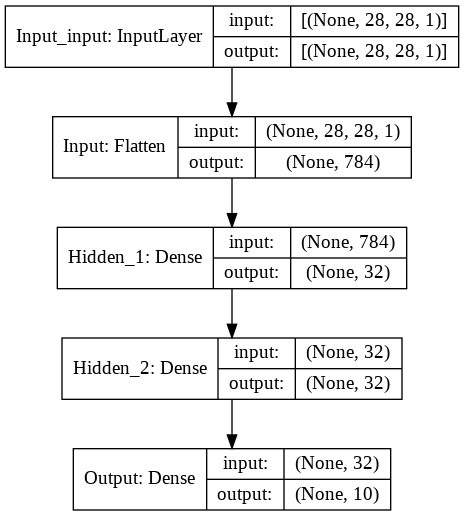

In [17]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Note : Use Sparse Categorical Crossentropy if labels are integers and Categorical Crossentropy if labels are one hot encoded.



In [19]:
validation_inputs, validation_targets = next(iter(validation_scaled))

In [20]:
model.fit(train_scaled, epochs=epochs, validation_data=(validation_inputs, validation_targets), verbose = 1)

Epoch 1/25
844/844 [==============================] - 9s 10ms/step - loss: 0.4509 - accuracy: 0.8709 - val_loss: 0.2455 - val_accuracy: 0.9242
Epoch 2/25
844/844 [==============================] - 4s 5ms/step - loss: 0.2189 - accuracy: 0.9366 - val_loss: 0.2025 - val_accuracy: 0.9380
Epoch 3/25
844/844 [==============================] - 5s 5ms/step - loss: 0.1748 - accuracy: 0.9489 - val_loss: 0.1766 - val_accuracy: 0.9460
Epoch 4/25
844/844 [==============================] - 4s 5ms/step - loss: 0.1488 - accuracy: 0.9566 - val_loss: 0.1632 - val_accuracy: 0.9522
Epoch 5/25
844/844 [==============================] - 5s 5ms/step - loss: 0.1300 - accuracy: 0.9619 - val_loss: 0.1488 - val_accuracy: 0.9577
Epoch 6/25
844/844 [==============================] - 4s 5ms/step - loss: 0.1159 - accuracy: 0.9658 - val_loss: 0.1456 - val_accuracy: 0.9587
Epoch 7/25
844/844 [==============================] - 4s 5ms/step - loss: 0.1040 - accuracy: 0.9695 - val_loss: 0.1445 - val_accuracy: 0.9577
Epoch

In [21]:
test_loss, test_accuracy = model.evaluate(test_scaled)

1/1 [==============================] - 1s 1s/step - loss: 0.1855 - accuracy: 0.9597


In [22]:
print(f'Test loss = {test_loss}, Test accuracy = {round((test_accuracy * 100), 2)}%')

Test loss = 0.18550941348075867, Test accuracy = 95.97%


<hr>